# Geospatial Analysis of data from Amazon rainforest

In [1]:
import xarray as xr
from datetime import date
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("data/data.nc").sel(expver=1).drop_vars("expver")
ds

<xarray.Dataset>
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

3 data variables:
 - *lai_hv*: vegetation index
 - *skt*: surface temperature 
 - *tp*: total precipitation

In [3]:
time = ds.time.to_series()
print("Data from {} to {}".format(time.min().strftime("%Y-%m-%d"), time.max().strftime("%Y-%m-%d")))

Data from 1979-01-01 to 2020-08-01


Data of year 2020 are removed to avoid problems with years analysis

In [4]:
ds = ds.where(ds.time.dt.year < 2020, drop=True)

In [5]:
y1979 = ds.time.dt.year == 1979
y2019 = ds.time.dt.year == 2019

In [6]:
ds1979 = ds.where(y1979, drop=True)
ds2019 = ds.where(y2019, drop=True)

## Data Visualization & Analysis

### Data distribution

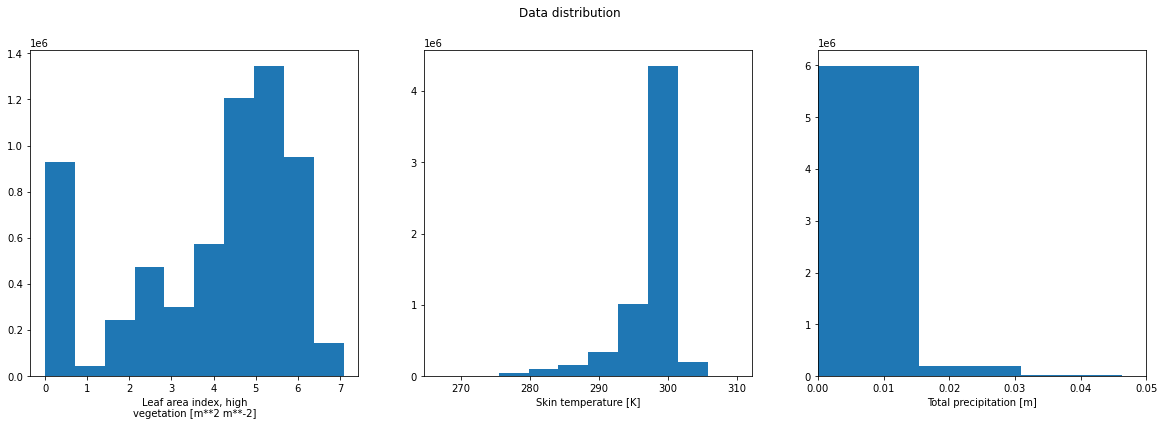

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
ds.lai_hv.plot(ax=axes[0]);
ds.skt.plot(ax=axes[1]);
ds.tp.plot(ax=axes[2]);
axes[2].set_xlim(0, 0.05)
plt.suptitle("Data distribution");

### Data on a single day

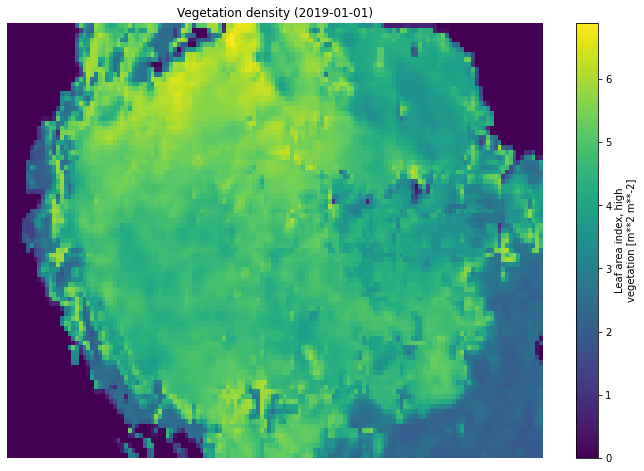

In [8]:
ds.sel(time="2019-01-01").lai_hv.plot(figsize=(12,8));
plt.title("Vegetation density (2019-01-01)");
plt.axis("off");

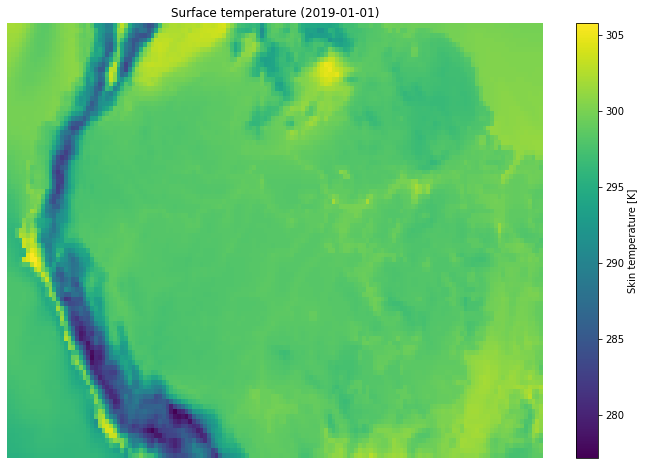

In [9]:
ds.sel(time="2019-01-01").skt.plot(figsize=(12,8));
plt.title("Surface temperature (2019-01-01)");
plt.axis("off");

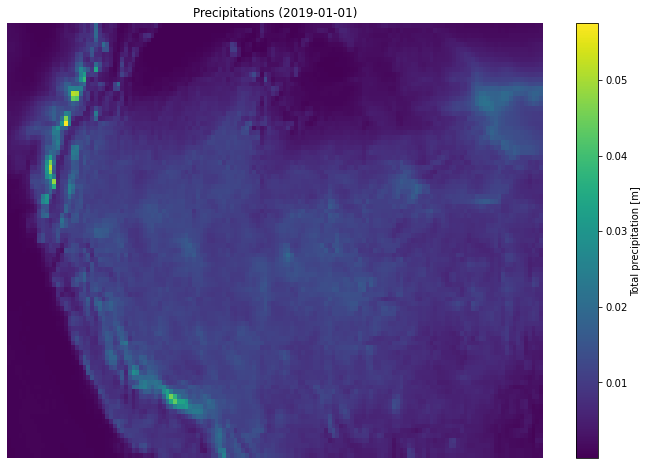

In [10]:
ds.sel(time="2019-01-01").tp.plot(figsize=(12,8));
plt.title("Precipitations (2019-01-01)");
plt.axis("off");

### Evolution over the year (2019)

In [11]:
ds2019_m = ds2019.mean(dim=["latitude", "longitude"])

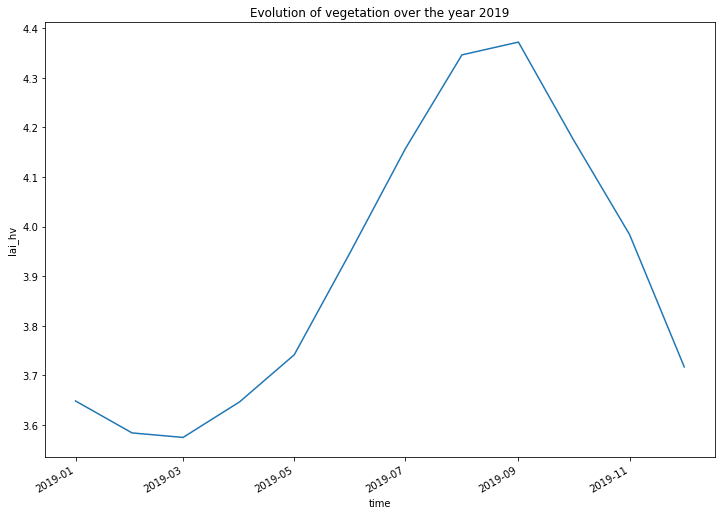

In [12]:
ds2019_m.lai_hv.plot(figsize=(12,8));
plt.title("Evolution of vegetation over the year 2019");

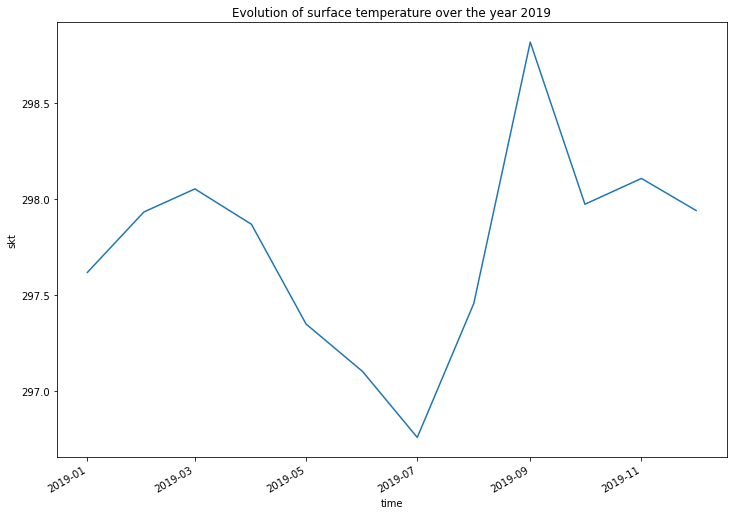

In [13]:
ds2019_m.skt.plot(figsize=(12,8));
plt.title("Evolution of surface temperature over the year 2019");

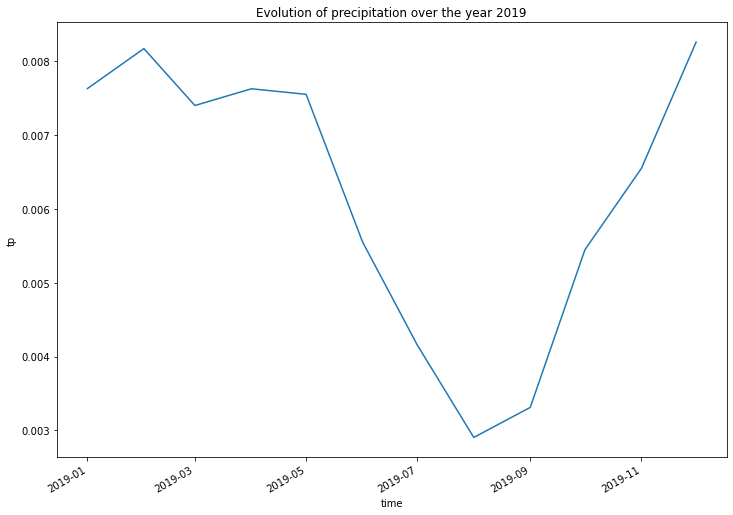

In [14]:
ds2019_m.tp.plot(figsize=(12,8));
plt.title("Evolution of precipitation over the year 2019");

### Evolution over the years

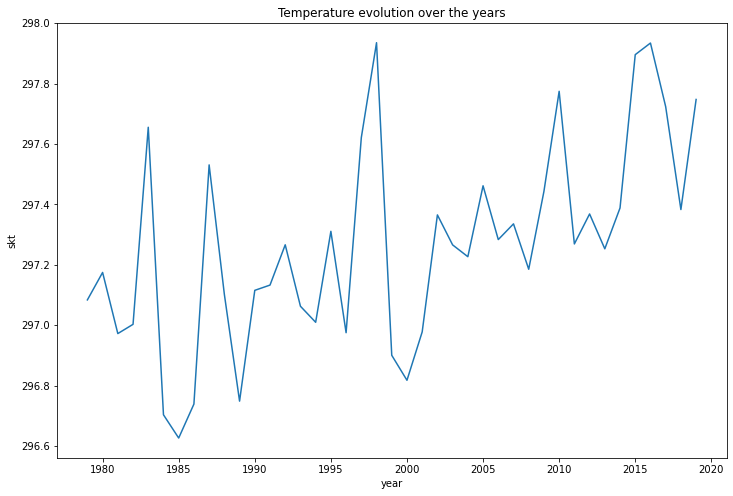

In [15]:
ds.groupby(ds.time.dt.year).mean(dim=["time", "latitude", "longitude"]).skt.plot(figsize=(12,8));
plt.title("Temperature evolution over the years");

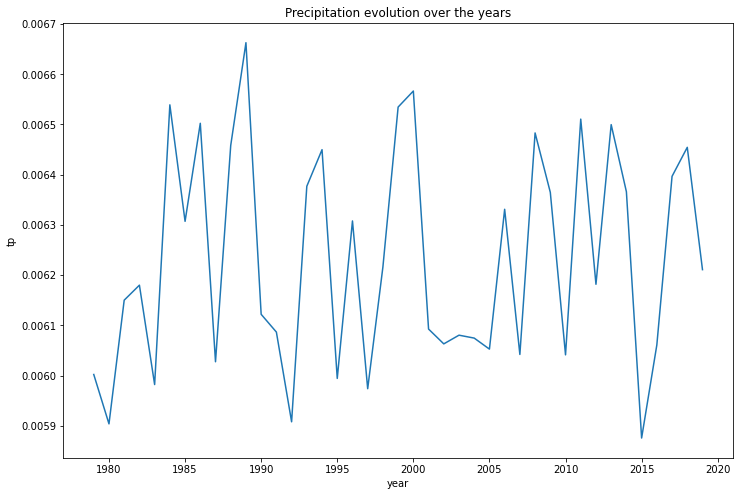

In [16]:
ds.groupby(ds.time.dt.year).mean(dim=["time", "latitude", "longitude"]).tp.plot(figsize=(12,8));
plt.title("Precipitation evolution over the years");

### Evolution over the decades

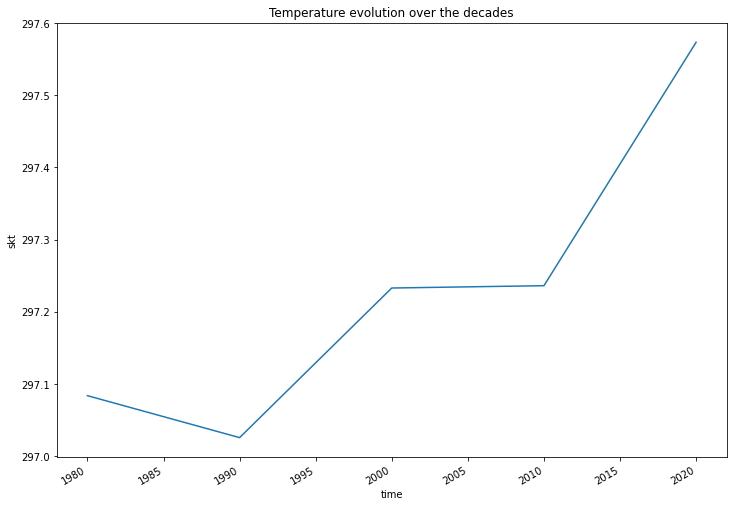

In [17]:
ds.resample({"time": "10y"}).mean(dim=["time", "latitude", "longitude"]).skt.plot(figsize=(12,8));
plt.title("Temperature evolution over the decades");

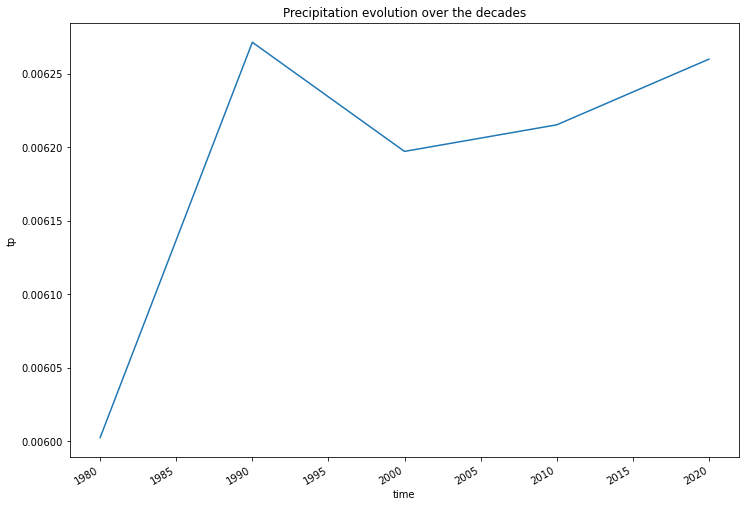

In [18]:
ds.resample({"time": "10y"}).mean(dim=["time", "latitude", "longitude"]).tp.plot(figsize=(12,8));
plt.title("Precipitation evolution over the decades");

### 1979 vs 2019 comparison

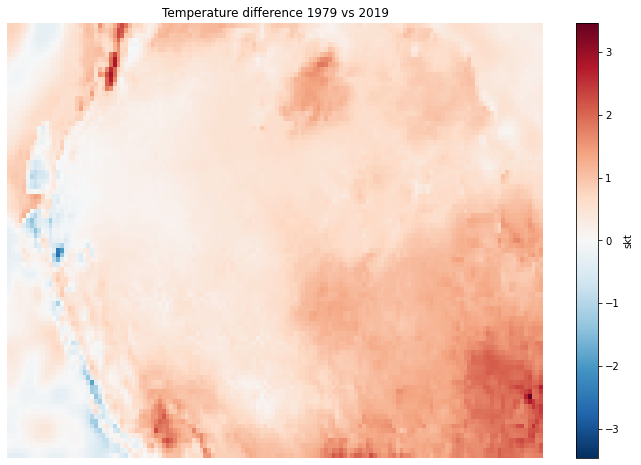

In [19]:
skt_diff = ds2019.skt.mean(dim="time")-ds1979.skt.mean(dim="time")
skt_diff.plot(figsize=(12,8));
plt.title("Temperature difference 1979 vs 2019");
plt.axis("off");

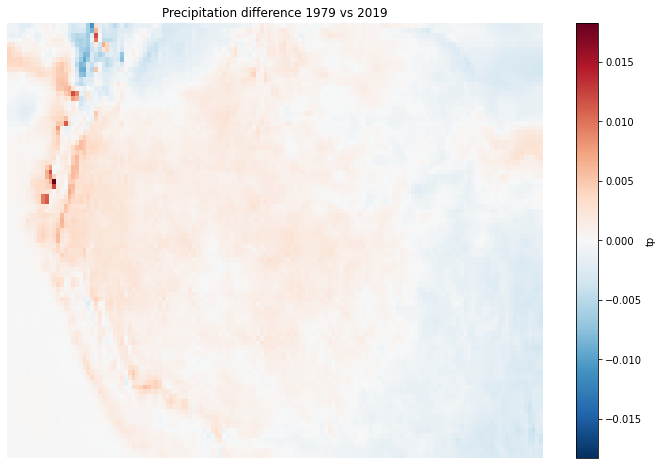

In [20]:
tp_diff = ds2019.tp.mean(dim="time")-ds1979.tp.mean(dim="time")
tp_diff.plot(figsize=(12,8));
plt.title("Precipitation difference 1979 vs 2019");
plt.axis("off");